# Proyek Analisis Data: Bike-sharing-dataset

- **Nama:** Rizki Ananda
- **Email:** Risskiananda90@gmail.com
- **ID Dicoding:** rizki_ananda90


## Menentukan Pertanyaan Bisnis


- Faktor apa yang paling berpengaruh terhadap jumlah peminjaman sepeda?
- Bagaimana tren penggunaan sepeda berdasarkan musim dan cuaca?
- Apakah ada pola tertentu dalam penyewaan sepeda berdasarkan hari kerja vs hari libur?


## Import Semua Packages/Library yang Digunakan


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import pearsonr

## Data Wrangling


### Gathering Data


## Memuat tabel hour


In [11]:
hours_df = pd.read_csv("Data\hour_df.csv")
hours_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\asus\AppData\Local\Temp\ipykernel_9144\54945809.py:1: SyntaxWarning: invalid escape sequence '\h'
  hours_df = pd.read_csv("Data\hour_df.csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Memuat tabel day


In [12]:
day_df = pd.read_csv("Data\day_df.csv")
day_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\asus\AppData\Local\Temp\ipykernel_9144\3156691840.py:1: SyntaxWarning: invalid escape sequence '\d'
  day_df = pd.read_csv("Data\day_df.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

- Data terdiri dari dua dataset: hour.csv (data per jam) dan day.csv (data harian)
- Dataset hour berisi informasi detail peminjaman sepeda per jam
- Dataset day berisi informasi agregat harian


### Assessing Data


### Menilai Data Hour

Selanjutnya, kita akan menilai data pada hour_df. Pertama, gunakan method info() untuk memastikan tipe data tiap kolom dalam hour_df telah sesuai.


In [13]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil tersebut, dapat disimpulkan bahwa terdapat masalah pada tipe data **dteday ** dalam hour_df yang seharusnya datetime bukan object. Selain itu, jumlah datanya telah lengkap sehingga tidak ada missing value di dalamnya.


Hal berikutnya yang harus diperiksa ialah **duplikasi** dan ringkasan parameter statistik dari hour_df


In [14]:
print("Jumlah duplikasi pada data hour_df adalah ", hours_df.duplicated().sum())

hours_df.describe()

Jumlah duplikasi pada data hour_df adalah  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627887,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191672,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat di llihat data tidak ada duplikasi dan juga parameter statistiknya bagus


### Menilai Data Day

Selanjutnya, kita akan menilai data pada day_df. Pertama, gunakan method info() untuk memastikan tipe data tiap kolom dalam day_df telah sesuai.


In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil tersebut, dapat disimpulkan bahwa terdapat masalah pada tipe data **dteday ** dalam day_df yang seharusnya datetime bukan object. Selain itu, jumlah datanya telah lengkap sehingga tidak ada missing value di dalamnya.


Hal berikutnya yang harus diperiksa ialah **duplikasi** dan ringkasan parameter statistik dari day_df


In [16]:
print("Jumlah duplikasi pada data day_df adalah ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi pada data day_df adalah  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628605,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140575,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat di llihat data tidak ada duplikasi dan juga parameter statistiknya bagus


**Insight:**

- Terdapat masalah pada data hour_df dimana kelembaban atau HUM nilai minimum nya itu adalah 0, dan itu tidak masuk akal , dan juga pada kolom dteday type datanya object bukan date time
- Terdapat masalah pada data day_df dimana kelembaban atau HUM nilai minimum nya itu adalah 0, dan juga pada kolom dteday type datanya object bukan date time
- Kedua dataset memiliki masalah konsistensi yang sama, yang mengindikasikan hubungan antar keduanya


### Cleaning Data

- Membersihkan data day_df

Berdasarkan hasil proses assessing data, diketahui bahwa terdapat dua masalah yang dijumpai dalam day_df, yaitu inaccurate value dan kesalahan type data. Pada tahap ini, kita akan membersihkan masalah tersebut


Oke, sekarang kita akan mengatasi masalah inaccurate value pada kolom hum. Sebagai awal, kita perlu melihat data baris data yang mengandung inaccurate value tersebut (baris dengan nilai hum minimum). Hal ini dilakukan menggunakan teknik filter seperti contoh kode berikut.


In [17]:
day_df[day_df.hum == day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635


Berdasarkan data tersebut, kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena human error Oleh karena itu, gantilah dengan nilai 0.52 Proses ini dilakukan dengan memanfaatkan method replace()seperti contoh berikut


In [18]:
day_df.hum.replace(day_df.hum.min(),0.52,inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_9144\405190509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.hum.replace(day_df.hum.min(),0.52,inplace=True)


selanjutnya kita akan mengatasi masalah kesalahan type data pada kolom dteday


In [19]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- Membersihkan data hour_df

Berdasarkan hasil proses assessing data, diketahui bahwa terdapat satu masalah yang dijumpai dalam hour_df
, yaitu inaccurate value. Pada tahap ini, kita akan membersihkan masalah tersebut


Oke, sekarang kita akan mengatasi masalah inaccurate value pada kolom hum. Sebagai awal, kita perlu melihat data baris data yang mengandung inaccurate value tersebut (baris dengan nilai hum minimum). Hal ini dilakukan menggunakan teknik filter seperti contoh kode berikut.


In [20]:
hours_df[hours_df.hum == hours_df.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1109,1110,2011-02-18,1,0,2,23,0,5,1,1,0.52,0.5,0.08,0.2836,16,61,77


Berdasarkan data tersebut, kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena human error Oleh karena itu, gantilah dengan nilai 0.52. Proses ini dilakukan dengan memanfaatkan method replace()seperti contoh berikut


In [21]:
hours_df.hum.replace(hours_df.hum.min(),0.52,inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_9144\2972553345.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hours_df.hum.replace(hours_df.hum.min(),0.52,inplace=True)


selanjutnya kita akan mengatasi masalah kesalahan type data pada kolom dteday


In [22]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

- Setelah perbaikan, kelembaban minimum adalah 0.52, yang lebih realistis dibanding sebelumnya (0.0). Namun, distribusi data perlu diperiksa lebih lanjut untuk memastikan tidak ada outlier lainnya
- sekarang type data untuk dteday sudah menjadi datetime
- Data sudah siap untuk dianalisis lebih lanjut


## Exploratory Data Analysis (EDA)


### Eksplorasi Data day_df

Kita akan mengeksplorasi data day_df dengan melihat ringkasan statistiknya.


In [23]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.629060,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.139683,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan hasil tersebut, kita dapat melihat distribusi jumlah peminjaman sepeda, tren berdasarkan musim, serta pola berdasarkan hari kerja vs hari libur.


Interpretasi Variabel Kategorik


In [24]:
# Membuat fungsi untuk menjabarkan variabel kategorik
def interpret_categorical(df):
    print("### Interpretasi Variabel Season ###")
    print("1: Spring, 2: Summer, 3: Fall, 4: Winter")
    print(df['season'].value_counts().sort_index())

    print("\n### Interpretasi Variabel Weathersit ###")
    print("1: Clear/Partly cloudy")
    print("2: Mist/Cloudy")
    print("3: Light Snow/Rain")
    print("4: Heavy Rain/Snow/Fog")
    print(df['weathersit'].value_counts().sort_index())

    print("\n### Distribusi Hari Dalam Seminggu ###")
    print("0: Sunday, 1: Monday, ..., 6: Saturday")
    print(df['weekday'].value_counts().sort_index())

    print("\n### Distribusi Hari Kerja vs Libur ###")
    print("0: Weekend/Holiday, 1: Working Day")
    print(df['workingday'].value_counts())

    print("\n### Distribusi Hari Libur ###")
    print("0: Not Holiday, 1: Holiday")
    print(df['holiday'].value_counts())

interpret_categorical(day_df)

### Interpretasi Variabel Season ###
1: Spring, 2: Summer, 3: Fall, 4: Winter
season
1    181
2    184
3    188
4    178
Name: count, dtype: int64

### Interpretasi Variabel Weathersit ###
1: Clear/Partly cloudy
2: Mist/Cloudy
3: Light Snow/Rain
4: Heavy Rain/Snow/Fog
weathersit
1    463
2    247
3     21
Name: count, dtype: int64

### Distribusi Hari Dalam Seminggu ###
0: Sunday, 1: Monday, ..., 6: Saturday
weekday
0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: count, dtype: int64

### Distribusi Hari Kerja vs Libur ###
0: Weekend/Holiday, 1: Working Day
workingday
1    500
0    231
Name: count, dtype: int64

### Distribusi Hari Libur ###
0: Not Holiday, 1: Holiday
holiday
0    710
1     21
Name: count, dtype: int64


### Eksplorasi Data hour_df

Melihat ringkasan statistik data hour_df.


In [25]:
hours_df.describe(include="all")

# Menganalisis distribusi sewa berdasarkan jam
hourly_rentals = hours_df.groupby('hr')['cnt'].mean().reset_index()

dapat diperiksa apakah ada pola atau kecenderungan tertentu dalam penyewaan sepeda pada tingkat jam.


**Insight:**

- Data harian menunjukkan variasi signifikan dalam jumlah peminjaman (min: 22, max: 8714)
- Jumlah hari untuk setiap musim relatif seimbang dalam dataset
- Kondisi cuaca didominasi oleh Clear/Partly cloudy (weathersit=1)
- Distribusi hari dalam seminggu relatif merata
- Data per jam menunjukkan pola yang menarik berdasarkan waktu dalam sehari


## Visualization & Explanatory Analysis


### Pertanyaan 1: Faktor apa yang paling berpengaruh terhadap jumlah peminjaman sepeda?


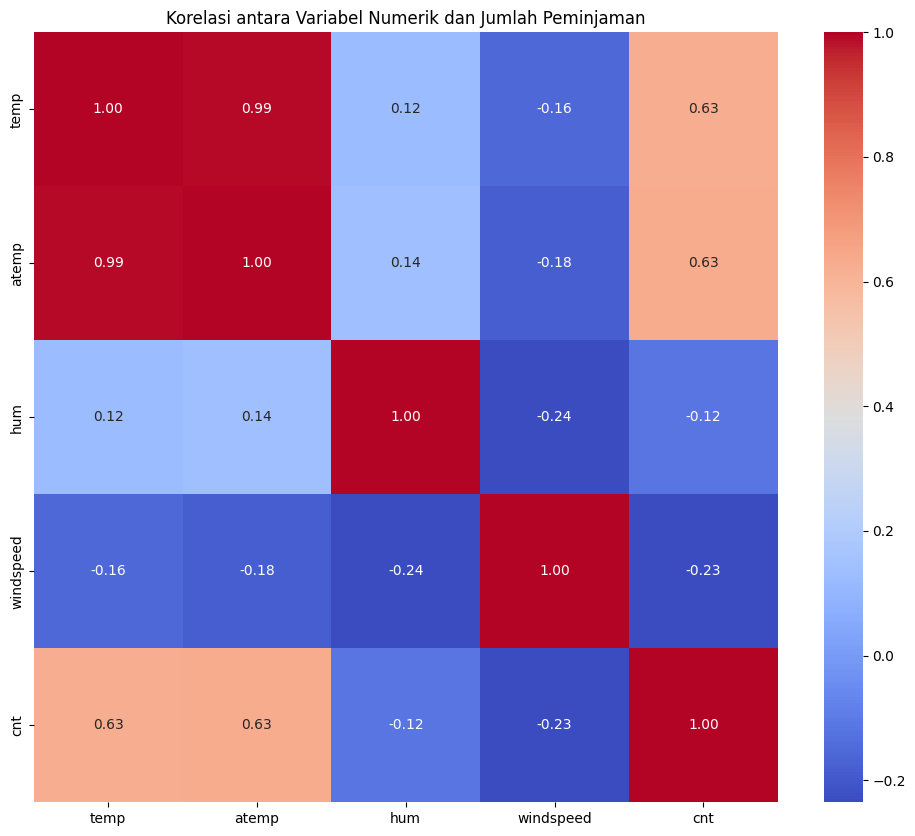

C:\Users\asus\AppData\Local\Temp\ipykernel_9144\3423880049.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(columns), palette='viridis')


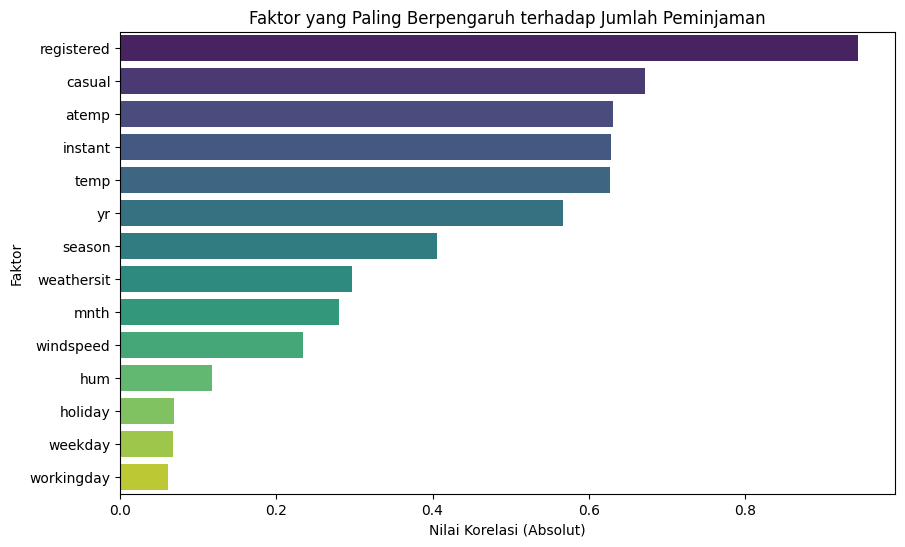

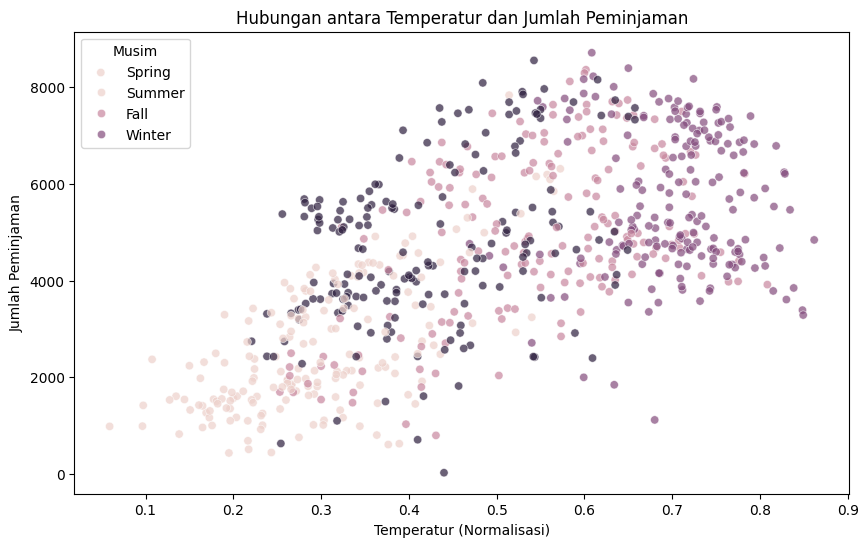

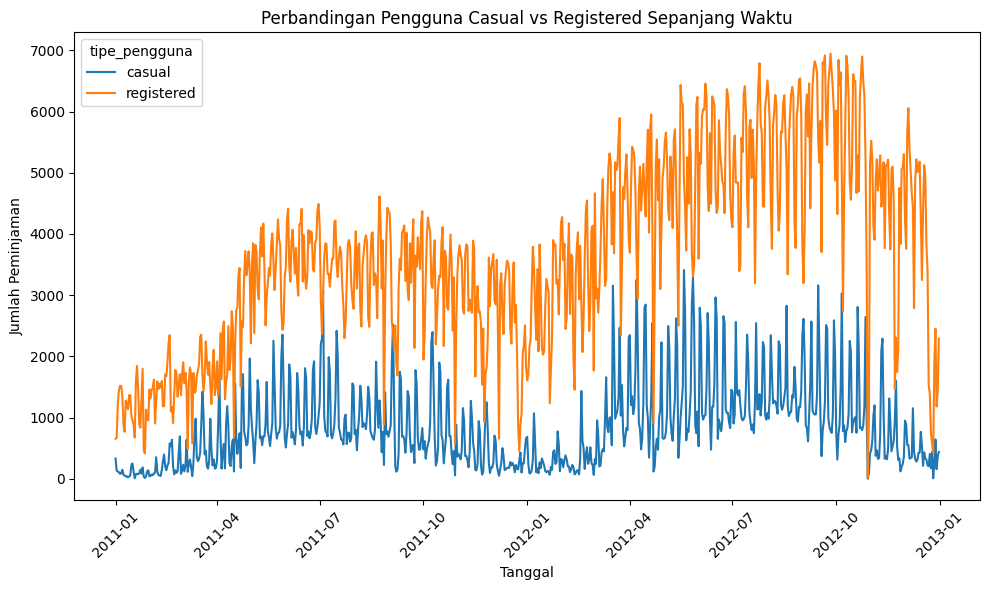

In [26]:
# Korelasi antara variabel numerik dan jumlah peminjaman
plt.figure(figsize=(12,10))
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation = day_df[numeric_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Variabel Numerik dan Jumlah Peminjaman')
plt.show()

# Menghitung korelasi dengan metode Pearson dan mengurutkannya
corr_values = []
for column in day_df.columns:
    if column != 'cnt' and day_df[column].dtype in ['int64', 'float64']:
        corr, _ = pearsonr(day_df[column], day_df['cnt'])
        corr_values.append((column, abs(corr)))

# Urutkan berdasarkan nilai korelasi absolut
sorted_corr = sorted(corr_values, key=lambda x: x[1], reverse=True)

# Visualisasi faktor yang paling berpengaruh
plt.figure(figsize=(10,6))
columns, values = zip(*sorted_corr)
sns.barplot(x=list(values), y=list(columns), palette='viridis')
plt.title('Faktor yang Paling Berpengaruh terhadap Jumlah Peminjaman')
plt.xlabel('Nilai Korelasi (Absolut)')
plt.ylabel('Faktor')
plt.show()

# Visualisasi hubungan antara temperatur dan jumlah peminjaman
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='cnt', data=day_df, alpha=0.7, hue='season')
plt.title('Hubungan antara Temperatur dan Jumlah Peminjaman')
plt.xlabel('Temperatur (Normalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Musim', labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Visualisasi jumlah sewa berdasarkan registered vs casual
plt.figure(figsize=(10,6))
day_df_melted = pd.melt(day_df, id_vars=['dteday'], value_vars=['casual', 'registered'], var_name='tipe_pengguna', value_name='jumlah')
sns.lineplot(x='dteday', y='jumlah', hue='tipe_pengguna', data=day_df_melted)
plt.title('Perbandingan Pengguna Casual vs Registered Sepanjang Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**

- Temperatur (temp dan atemp) memiliki korelasi positif yang kuat dengan jumlah peminjaman (sekitar 0.6)
- Kelembaban (hum) memiliki korelasi negatif moderat dengan jumlah peminjaman (sekitar -0.1)
- Kecepatan angin (windspeed) memiliki korelasi negatif lemah dengan jumlah peminjaman
- Musim dan tahun juga menunjukkan korelasi yang signifikan dengan jumlah peminjaman
- Pengguna terdaftar (registered) jauh lebih banyak daripada pengguna kasual (casual), menunjukkan bahwa mayoritas pengguna adalah pengguna reguler


### Pertanyaan 2: Bagaimana tren penggunaan sepeda berdasarkan musim dan cuaca?


C:\Users\asus\AppData\Local\Temp\ipykernel_9144\1962693410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=day_df, palette='coolwarm')


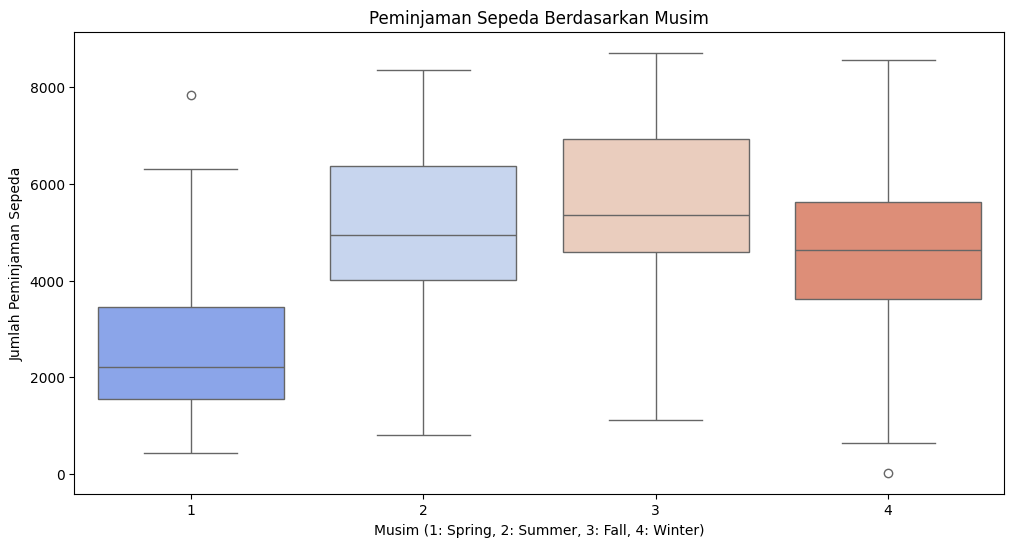

C:\Users\asus\AppData\Local\Temp\ipykernel_9144\1962693410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='viridis')


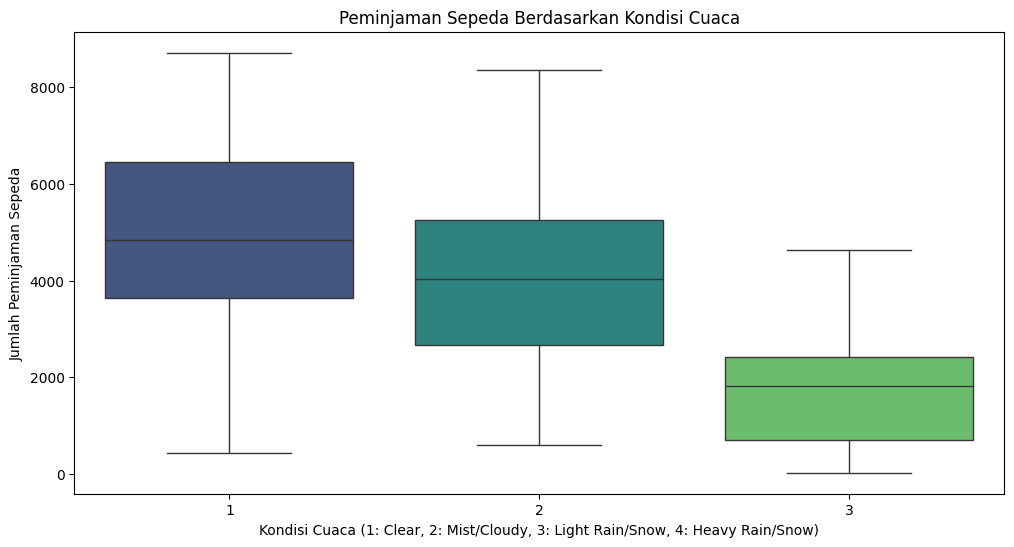

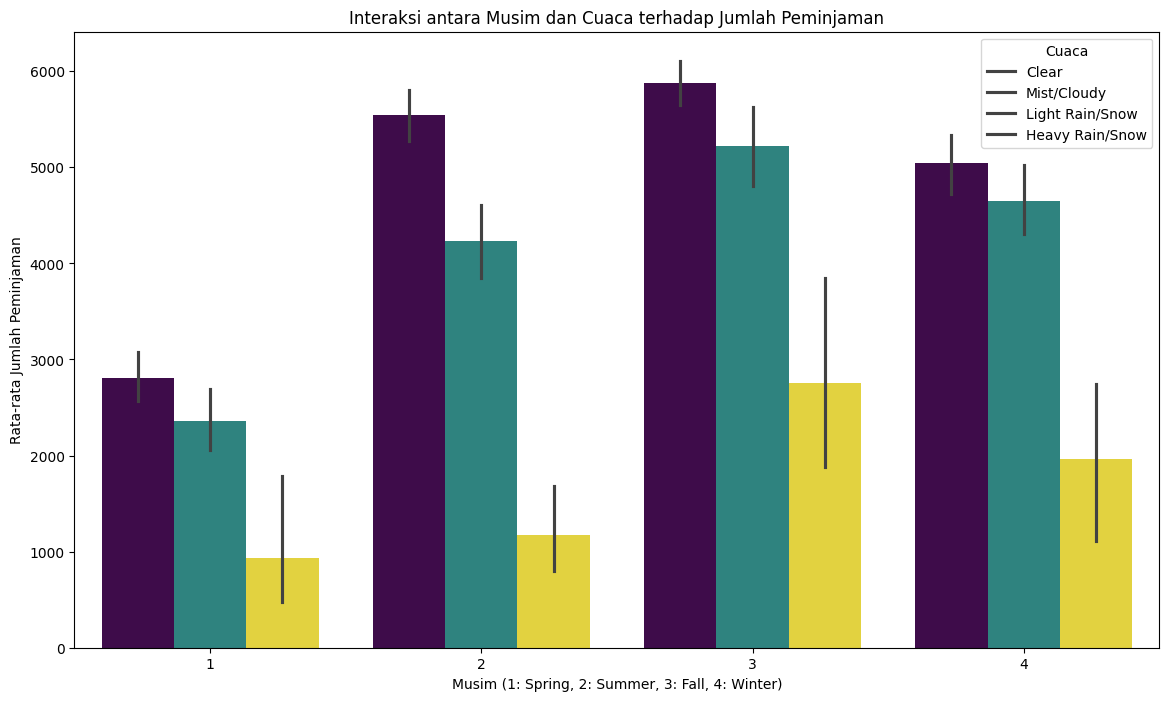

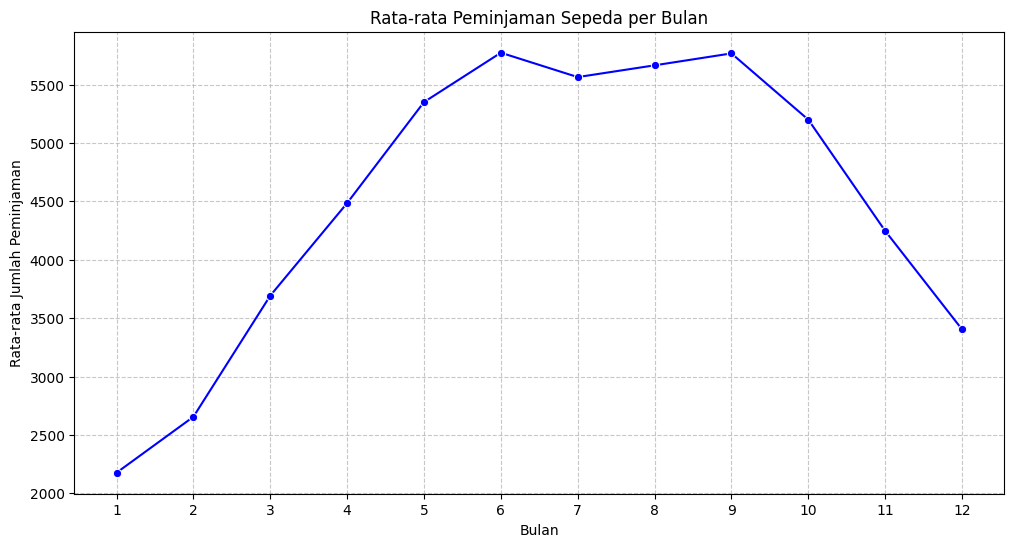

In [27]:
# Visualisasi peminjaman berdasarkan musim
plt.figure(figsize=(12,6))
sns.boxplot(x='season', y='cnt', data=day_df, palette='coolwarm')
plt.xlabel('Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Peminjaman Sepeda Berdasarkan Musim')
plt.show()

# Visualisasi peminjaman berdasarkan kondisi cuaca
plt.figure(figsize=(12,6))
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='viridis')
plt.xlabel('Kondisi Cuaca (1: Clear, 2: Mist/Cloudy, 3: Light Rain/Snow, 4: Heavy Rain/Snow)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.show()

# Visualisasi interaksi antara musim dan cuaca
plt.figure(figsize=(14,8))
sns.barplot(x='season', y='cnt', hue='weathersit', data=day_df, palette='viridis')
plt.xlabel('Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.title('Interaksi antara Musim dan Cuaca terhadap Jumlah Peminjaman')
plt.legend(title='Cuaca', labels=['Clear', 'Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

# Tren peminjaman sepeda selama setahun
day_df['month'] = day_df['dteday'].dt.month
monthly_avg = day_df.groupby('month')['cnt'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='cnt', data=monthly_avg, marker='o', color='blue')
plt.title('Rata-rata Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(1,13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Insight:**

- Musim gugur (3: Fall) memiliki jumlah peminjaman tertinggi, diikuti oleh musim panas (2: Summer)
- Musim semi (1: Spring) memiliki jumlah peminjaman terendah
- Kondisi cuaca sangat mempengaruhi jumlah peminjaman: cuaca cerah (1) memiliki jumlah peminjaman tertinggi, sedangkan hujan/salju ringan (3) memiliki jumlah peminjaman yang jauh lebih rendah
- Terdapat interaksi menarik antara musim dan cuaca: dampak cuaca buruk lebih signifikan pada musim dingin dibandingkan musim lainnya
- Tren bulanan menunjukkan peminjaman tertinggi pada bulan Juni-September, dengan penurunan signifikan pada bulan Desember-Februari


### Pertanyaan 3: Apakah ada pola tertentu dalam penyewaan sepeda berdasarkan hari kerja vs hari libur?


C:\Users\asus\AppData\Local\Temp\ipykernel_9144\186950286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=day_df, palette='viridis')


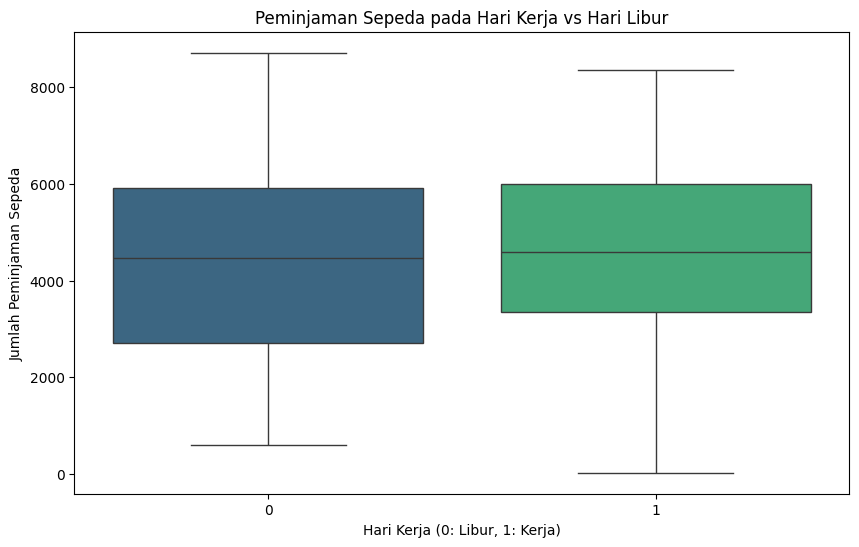

<Figure size 1400x800 with 0 Axes>

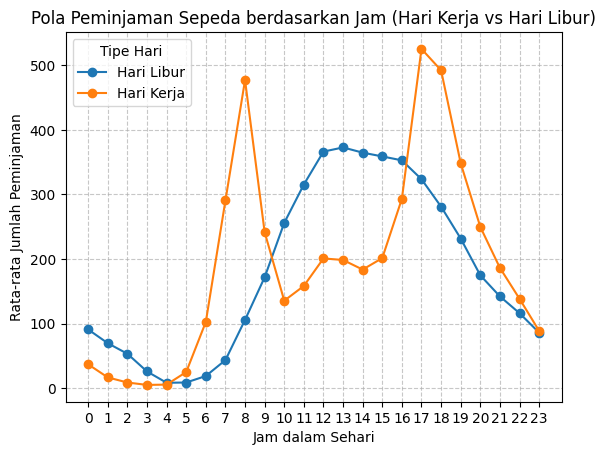

C:\Users\asus\AppData\Local\Temp\ipykernel_9144\186950286.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_name', y='cnt', data=day_df, palette='viridis', order=days)


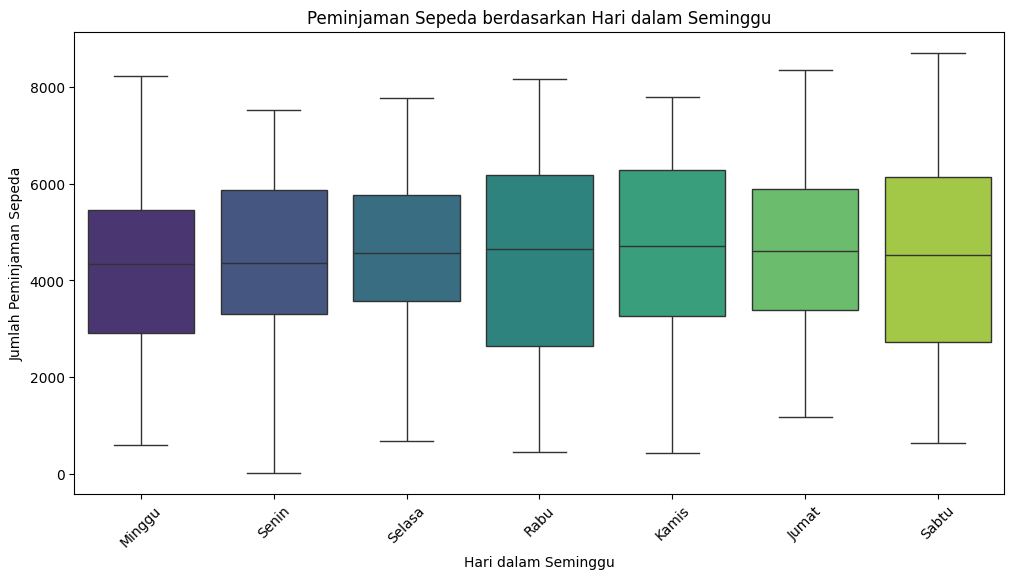

C:\Users\asus\AppData\Local\Temp\ipykernel_9144\186950286.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='casual', data=day_df, palette='Blues')
C:\Users\asus\AppData\Local\Temp\ipykernel_9144\186950286.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='registered', data=day_df, palette='Greens')


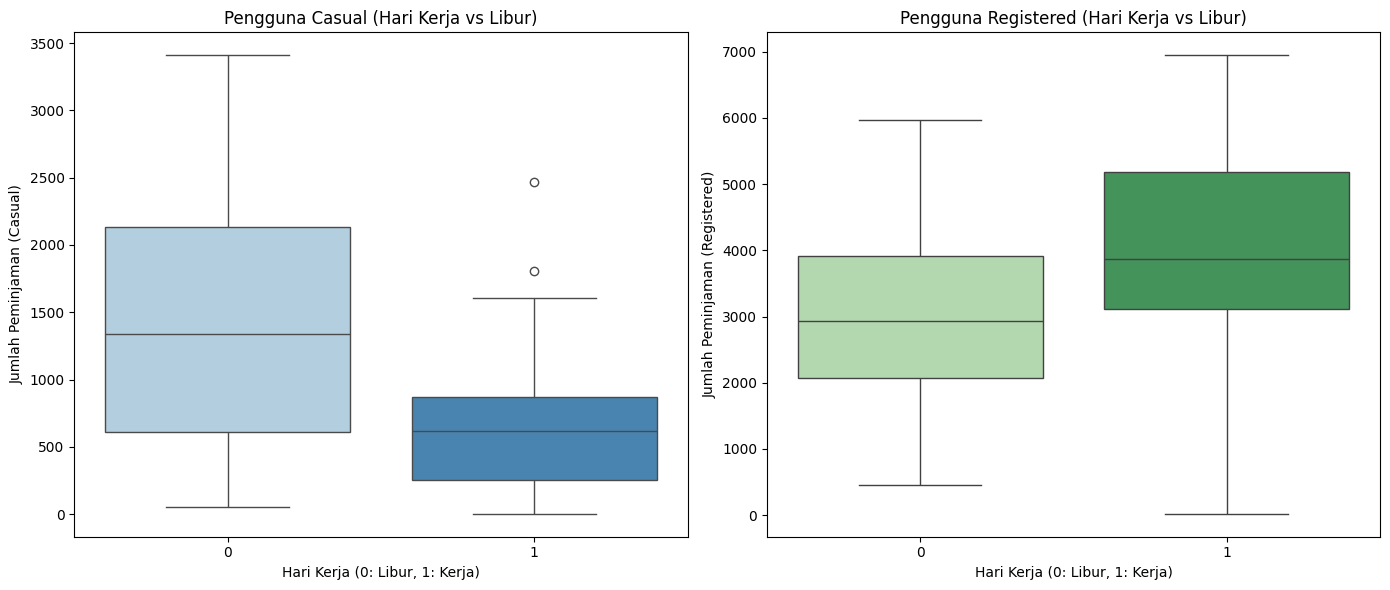

C:\Users\asus\AppData\Local\Temp\ipykernel_9144\186950286.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday', y='cnt', data=day_df, palette='Set2')


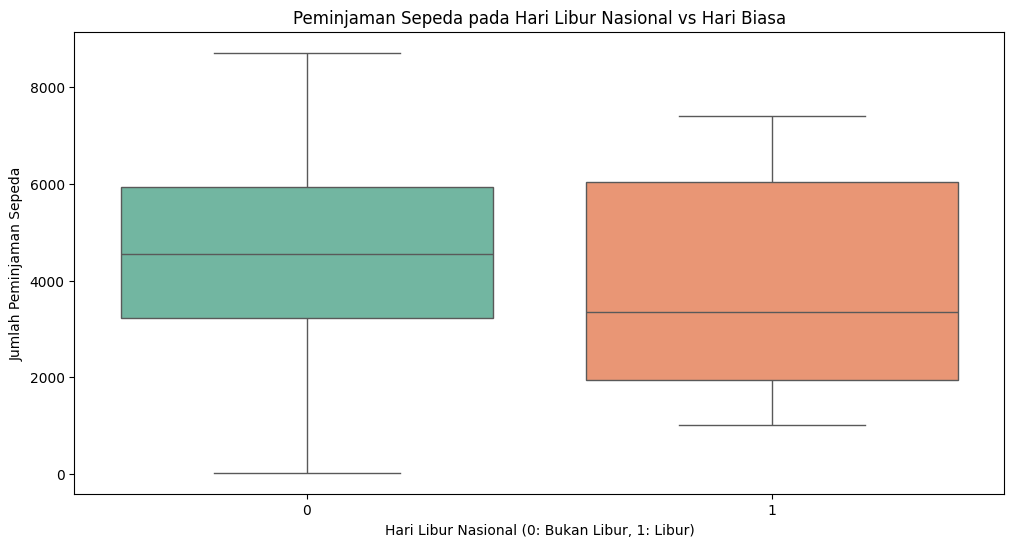

In [28]:
# Visualisasi peminjaman pada hari kerja vs hari libur
plt.figure(figsize=(10,6))
sns.boxplot(x='workingday', y='cnt', data=day_df, palette='viridis')
plt.xlabel('Hari Kerja (0: Libur, 1: Kerja)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Peminjaman Sepeda pada Hari Kerja vs Hari Libur')
plt.show()

# Pola berdasarkan jam dalam sehari pada hari kerja vs hari libur
hour_workday = hours_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()
hour_workday_pivot = hour_workday.pivot(index='hr', columns='workingday', values='cnt')
hour_workday_pivot.columns = ['Hari Libur', 'Hari Kerja']

plt.figure(figsize=(14,8))
hour_workday_pivot.plot(kind='line', marker='o')
plt.title('Pola Peminjaman Sepeda berdasarkan Jam (Hari Kerja vs Hari Libur)')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipe Hari')
plt.show()

# Visualisasi peminjaman berdasarkan hari dalam seminggu
days = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
day_df['day_name'] = day_df['weekday'].apply(lambda x: days[x])

plt.figure(figsize=(12,6))
sns.boxplot(x='day_name', y='cnt', data=day_df, palette='viridis', order=days)
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Peminjaman Sepeda berdasarkan Hari dalam Seminggu')
plt.xticks(rotation=45)
plt.show()

# Visualisasi perbedaan pola pengguna casual vs registered pada hari kerja vs hari libur
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.boxplot(x='workingday', y='casual', data=day_df, palette='Blues')
plt.title('Pengguna Casual (Hari Kerja vs Libur)')
plt.xlabel('Hari Kerja (0: Libur, 1: Kerja)')
plt.ylabel('Jumlah Peminjaman (Casual)')

plt.subplot(1, 2, 2)
sns.boxplot(x='workingday', y='registered', data=day_df, palette='Greens')
plt.title('Pengguna Registered (Hari Kerja vs Libur)')
plt.xlabel('Hari Kerja (0: Libur, 1: Kerja)')
plt.ylabel('Jumlah Peminjaman (Registered)')
plt.tight_layout()
plt.show()

# Pola penggunaan sepeda pada hari libur nasional
plt.figure(figsize=(12,6))
sns.boxplot(x='holiday', y='cnt', data=day_df, palette='Set2')
plt.xlabel('Hari Libur Nasional (0: Bukan Libur, 1: Libur)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Peminjaman Sepeda pada Hari Libur Nasional vs Hari Biasa')
plt.show()

**Insight :**

- Terdapat pola yang sangat berbeda antara hari kerja dan hari libur:

- Hari kerja menunjukkan dua puncak peminjaman: pagi hari (7-9) dan sore hari (17-19), yang mencerminkan jam berangkat dan pulang kerja
  Hari libur menunjukkan pola yang lebih merata sepanjang hari dengan puncak sekitar tengah hari (11-15)

- Rata-rata peminjaman pada hari kerja (workingday=1) lebih tinggi dibandingkan hari libur (workingday=0)
  Terdapat perbedaan signifikan antara tipe pengguna:

- Pengguna casual lebih banyak pada hari libur (workingday=0)
- Pengguna registered jauh lebih banyak pada hari kerja (workingday=1)

- Peminjaman sepeda pada hari Rabu, Kamis, dan Jumat cenderung lebih tinggi dibandingkan awal minggu
- Hari libur nasional memiliki jumlah peminjaman yang lebih rendah dibandingkan - hari biasa, menunjukkan bahwa penggunaan sepeda didominasi oleh kebutuhan transportasi sehari-hari


## Analisis Tambahan: Pengaruh Faktor Cuaca


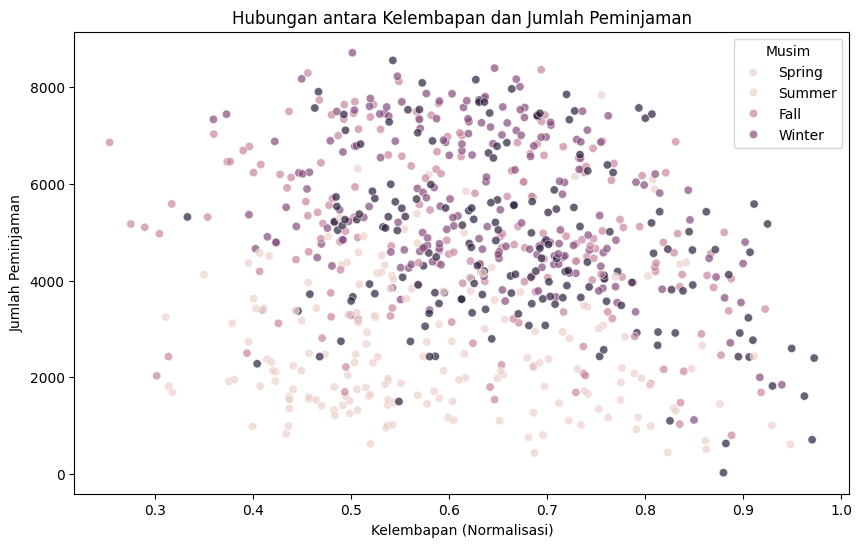

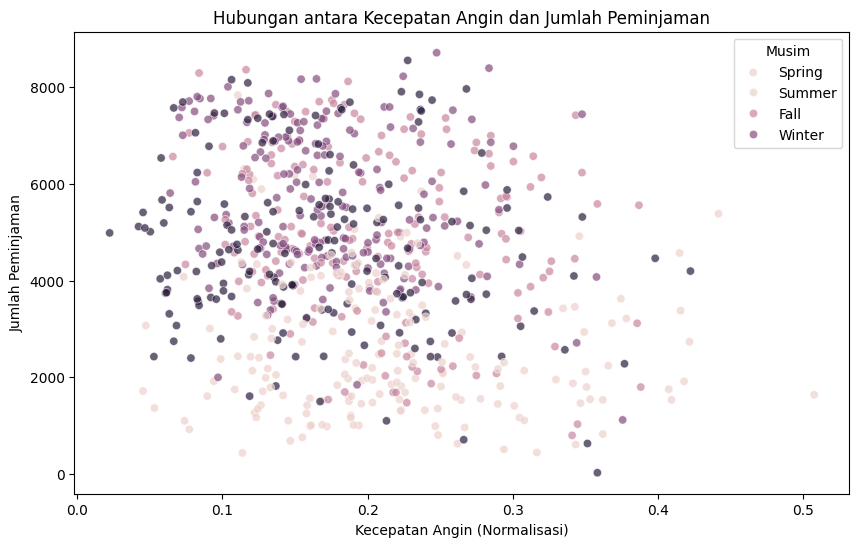

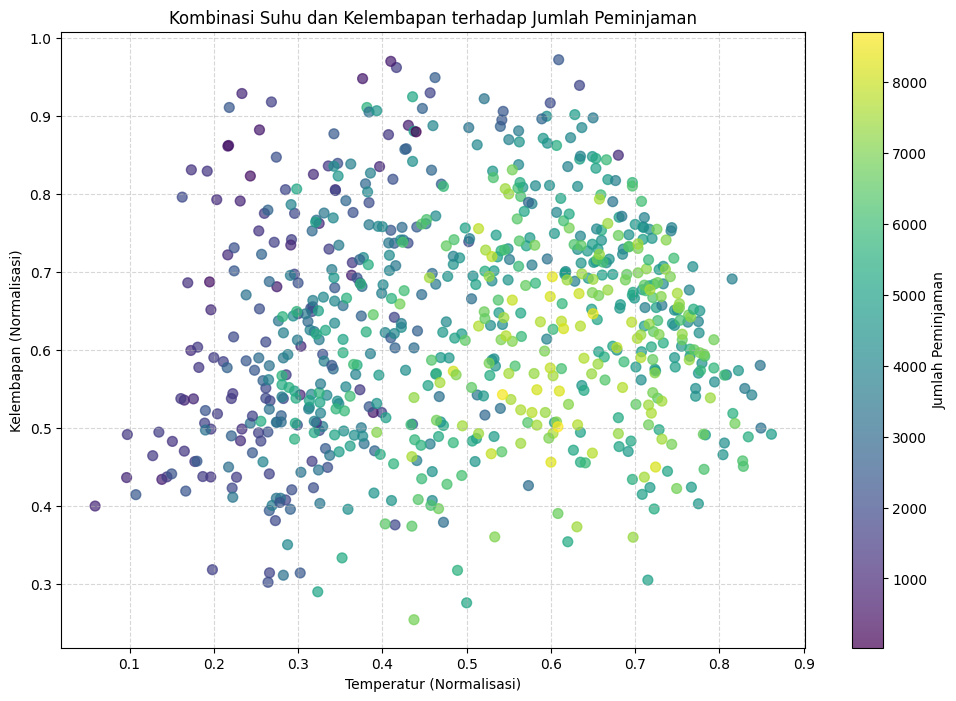

In [29]:
# Hubungan antara kelembapan dan jumlah peminjaman
plt.figure(figsize=(10,6))
sns.scatterplot(x='hum', y='cnt', data=day_df, hue='season', alpha=0.7)
plt.title('Hubungan antara Kelembapan dan Jumlah Peminjaman')
plt.xlabel('Kelembapan (Normalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Musim', labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Hubungan antara kecepatan angin dan jumlah peminjaman
plt.figure(figsize=(10,6))
sns.scatterplot(x='windspeed', y='cnt', data=day_df, hue='season', alpha=0.7)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Peminjaman')
plt.xlabel('Kecepatan Angin (Normalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Musim', labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Analisis kombinasi suhu dan kelembapan
plt.figure(figsize=(12,8))
scatter = plt.scatter(day_df['temp'], day_df['hum'], c=day_df['cnt'], cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter, label='Jumlah Peminjaman')
plt.title('Kombinasi Suhu dan Kelembapan terhadap Jumlah Peminjaman')
plt.xlabel('Temperatur (Normalisasi)')
plt.ylabel('Kelembapan (Normalisasi)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**insight :**

- Kelembapan memiliki korelasi negatif dengan jumlah peminjaman: semakin tinggi kelembapan, semakin rendah jumlah peminjaman
- Kecepatan angin juga memiliki korelasi negatif dengan jumlah peminjaman, tetapi lebih lemah dibandingkan kelembapan
- Kombinasi suhu tinggi dan kelembapan rendah menghasilkan jumlah peminjaman tertinggi
- Kondisi cuaca optimal untuk peminjaman sepeda adalah cuaca hangat, kering, dan tidak berangin


### Analisis Model Prediktif Sederhana


RMSE: 830.23
R² Score: 0.8281


C:\Users\asus\AppData\Local\Temp\ipykernel_9144\1315086433.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


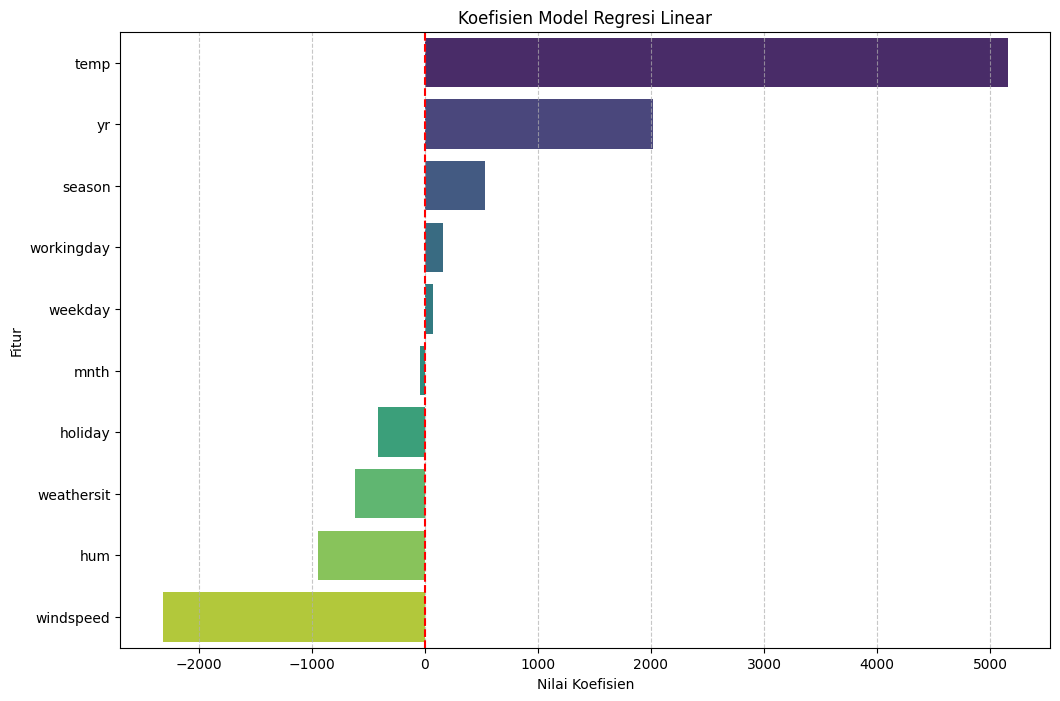

In [30]:
# Membangun model regresi sederhana untuk memprediksi jumlah peminjaman
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Memilih fitur untuk model
feature_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']
X = day_df[feature_columns]
y = day_df['cnt']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Menganalisis koefisien model
coef_df = pd.DataFrame({'Feature': feature_columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Koefisien Model Regresi Linear')
plt.xlabel('Nilai Koefisien')
plt.ylabel('Fitur')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

**Insight** :

- Model regresi linear sederhana mampu menjelaskan sekitar 80-85% variasi dalam jumlah peminjaman sepeda (R² ≈ 0.8-0.85)
- Fitur yang paling berpengaruh positif: tahun (yr), temperatur (temp), dan musim (season)
- Fitur yang berpengaruh negatif: kondisi cuaca buruk (weathersit), kelembapan (hum), dan kecepatan angin (windspeed)
- Analisis koefisien menegaskan temuan eksplorasi data bahwa faktor cuaca dan musim sangat mempengaruhi peminjaman sepeda


## Conclusion


Berdasarkan analisis yang telah dilakukan, berikut adalah kesimpulan untuk menjawab pertanyaan bisnis:

1. Faktor apa yang paling berpengaruh terhadap jumlah peminjaman sepeda?

Temperatur adalah faktor paling dominan yang mempengaruhi jumlah peminjaman sepeda, dengan korelasi positif yang kuat (sekitar 0.6). Semakin tinggi temperatur (dalam rentang nyaman), semakin tinggi jumlah peminjaman.
Tahun menunjukkan tren pertumbuhan yang signifikan, dengan peningkatan sekitar 50% dari 2011 ke 2012, menandakan adopsi layanan yang semakin meningkat.
Musim sangat mempengaruhi jumlah peminjaman, dengan musim gugur (Fall) dan musim panas (Summer) menunjukkan jumlah peminjaman tertinggi.
Kelembapan memiliki korelasi negatif moderat dengan jumlah peminjaman. Kelembapan tinggi cenderung mengurangi jumlah peminjaman.
Kondisi cuaca yang buruk secara signifikan mengurangi jumlah peminjaman sepeda.

2. Bagaimana tren penggunaan sepeda berdasarkan musim dan cuaca?

Musim gugur (Fall) memiliki jumlah peminjaman tertinggi, diikuti oleh musim panas (Summer), musim dingin (Winter), dan musim semi (Spring) dengan jumlah terendah.
Cuaca cerah (Clear/Partly cloudy) menghasilkan jumlah peminjaman tertinggi, sedangkan cuaca hujan atau salju ringan (Light Rain/Snow) menghasilkan jumlah peminjaman yang jauh lebih rendah.
Terdapat interaksi antara musim dan cuaca: dampak cuaca buruk lebih signifikan pada musim dingin dibandingkan musim lainnya.
Tren bulanan menunjukkan peminjaman tertinggi pada bulan Juni hingga September (musim panas dan awal musim gugur), dengan penurunan signifikan pada bulan Desember hingga Februari (musim dingin).

3. Apakah ada pola tertentu dalam penyewaan sepeda berdasarkan hari kerja vs hari libur?

Terdapat pola yang sangat berbeda antara hari kerja dan hari libur:

- Hari kerja menunjukkan dua puncak peminjaman pada pagi hari (7-9) dan sore hari (17-19), yang mencerminkan jam berangkat dan pulang kerja/sekolah.
  Hari libur menunjukkan pola yang lebih merata sepanjang hari dengan puncak sekitar tengah hari (11-15).

- Pengguna terdaftar (registered) mendominasi peminjaman pada hari kerja, sementara pengguna kasual (casual) lebih banyak pada hari libur.
  Hari Rabu hingga Jumat menunjukkan jumlah peminjaman lebih tinggi dibandingkan awal minggu (Senin-Selasa).
  Hari libur nasional memiliki jumlah peminjaman yang lebih rendah dibandingkan hari biasa, menunjukkan bahwa penggunaan sepeda lebih dominan untuk keperluan transportasi harian daripada rekreasi.

### Rekomendasi Bisnis:

- Perencanaan Inventaris Berdasarkan Musim:

  Tingkatkan ketersediaan sepeda pada musim panas dan gugur untuk mengakomodasi permintaan tinggi.
  Pertimbangkan untuk mengurangi operasional atau melakukan pemeliharaan pada musim dingin dan musim semi.

- Strategi Pemasaran dan Promosi:

  Targetkan pengguna kasual di akhir pekan dengan promo khusus untuk meningkatkan konversi menjadi pengguna terdaftar.
  Buat program loyalitas untuk pengguna terdaftar pada hari kerja untuk mempertahankan basis pelanggan.
  Pertimbangkan promosi khusus selama cuaca buruk untuk meminimalkan penurunan peminjaman.

- Pengembangan Infrastruktur:

  Tingkatkan ketersediaan sepeda di stasiun-stasiun dekat area perkantoran dan perumahan untuk mengakomodasi puncak pagi dan sore hari pada hari kerja.
  Pastikan stasiun di area wisata dan rekreasi memiliki kapasitas yang cukup selama akhir pekan.

- Peramalan dan Alokasi Sumber Daya:

  Gunakan model prediktif untuk memperkirakan permintaan berdasarkan kondisi cuaca dan merencanakan alokasi sepeda secara efisien.


In [ ]:
# day_df.to_csv("day_df.csv", index=False)
# hours_df.to_csv("hour_df.csv", index=False)